In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
#To calculate the alignment score generating english and hindi hidden sates randomly
#Note that practically hidden state will come from encoder and hindi from decoder
key=tf.random.normal(shape=(1,4,5))
#1:no of sentence,4: no of words, 5: no.of LSTM
query=tf.random.normal(shape=(1,1,5))
#1:no of sentence,1: no of words, 5: no.of LSTM
#practicallly key and values are different,but for the sake of simplicity,key and value are taken same
value=tf.identity(key)

In [18]:
#Step 2: pass query and key to dense layer,Let us define the dense layer
w_k=tf.keras.layers.Dense(8)
w_q=tf.keras.layers.Dense(8)

In [19]:
#Now let us pass this quer and key to dense layer
query=w_q(query)
key=w_k(key)

In [20]:
print("This is encoder hidden states(English) after dense layer")
print(key)

This is encoder hidden states(English) after dense layer
tf.Tensor(
[[[-0.45524186  0.46603784 -0.01982749  0.4054026  -0.07186634
   -0.48003662 -0.11677375  0.67302626]
  [ 0.82228434 -0.96037424  0.7906288  -0.9113282   0.20812045
    1.1263248  -0.13159513 -1.1001142 ]
  [-0.26121876  0.12759028 -0.8549876   1.2731094   0.93241096
   -0.30118695 -0.98875606  0.81466305]
  [ 1.5082101  -1.6057025   0.8189245  -1.4765685   1.6315415
   -0.8945791  -1.2228415  -0.68348575]]], shape=(1, 4, 8), dtype=float32)


In [21]:
#you can observe the output shape(1,4,8)key
print("This is decoder hidden states(Hindi) after dense layer")
print(query)

This is decoder hidden states(Hindi) after dense layer
tf.Tensor(
[[[ 0.4252594  -0.70196533  0.15745676 -0.5295378  -0.8835073
   -0.8220808  -0.7119185  -0.6926466 ]]], shape=(1, 1, 8), dtype=float32)


In [ ]:
#observe the shape is (1,1,8)

In [22]:
#step 3:Now sum the query and key
#you can not do it directly like qury+key
#we want output in the shape
# #1:no of sentence,4: no of words, 5: no.of LSTM
# That is whu we expand the dimension at desired axis
query=tf.expand_dims(query,axis=2)
key=tf.expand_dims(key,axis=1)
query_plus_key=tf.nn.tanh(query+key)
print("After sum of query and key")
print(query_plus_key)

After sum of query and key
tf.Tensor(
[[[[-0.02997346 -0.23164542  0.1367668  -0.12350147 -0.7422062
    -0.86226726 -0.67977315 -0.01961784]
   [ 0.8475934  -0.9305316   0.73891515 -0.8938719  -0.5885122
     0.29519162 -0.6876656  -0.9460512 ]
   [ 0.1625849  -0.51856506 -0.60279816  0.63129824  0.04886469
    -0.8087025  -0.93549323  0.12141447]
   [ 0.9590128  -0.9803964   0.7514951  -0.96445644  0.63397473
    -0.9374596  -0.9591164  -0.88008225]]]], shape=(1, 1, 4, 8), dtype=float32)


In [23]:
# we do not need last unit axis,i.e.8 that is why we pass it through single neuron
single_neuron=tf.keras.layers.Dense(1)

In [24]:
score=single_neuron(query_plus_key)
print(score.shape)

(1, 1, 4, 1)


In [25]:
#Now instead of 8 ,we are getting 1 as last unit axis,let us squeez that to final score
score=tf.squeeze(score,-1)
print(score.shape)

(1, 1, 4)


In [26]:
print("The final alignment score")
print(score.shape)

The final alignment score
(1, 1, 4)


In [28]:
#Step 4:calculate attention weights
attention_weights=tf.nn.softmax(score,-1)
print(attention_weights)

tf.Tensor([[[0.22133699 0.1044247  0.26187977 0.41235852]]], shape=(1, 1, 4), dtype=float32)


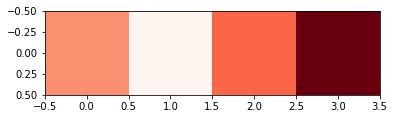

In [30]:
plt.imshow(tf.squeeze(attention_weights,0),cmap='Reds')
plt.show()

In [31]:
#Step 5: calculating Context vector
context_vector=tf.matmul(attention_weights,value)
print(context_vector)

tf.Tensor([[[-0.01605296 -1.4171336   0.20643687 -0.20967212 -0.10804856]]], shape=(1, 1, 5), dtype=float32)
